<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Data-1" data-toc-modified-id="Data-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data 1</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [20, 16]
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
df = pd.read_csv('data_1_1.csv')

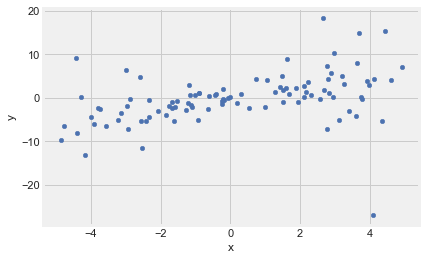

In [5]:
df.plot(x='x',y='y',kind='scatter',c='b');

In [6]:
# looks like one data point at right bottom is outlier

In [7]:
# we can check simple OLS regression outliers test using statsmodels

In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics as smg

In [9]:
x = df.x
y = df.y
regression = smf.ols("data ~ x", data=dict(data=y, x=x)).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   data   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     19.22
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           2.93e-05
Time:                        11:35:09   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             621.1
Df Residuals:                      98   BIC:                             626.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2695      0.536     -0.503      0.616      -1.333       0.794
x              0.8808      0.201      4.384      0.000       0.482       1.279
==============================================================================
Omnibus:                       51.887   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.400
Skew:                          -1.324   Prob(JB):                    2.63e-103
Kurtosis:                      13.313   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
test = regression.outlier_test()
print(test.shape)
test.head()

(100, 3)


,student_resid,unadj_p,bonf(p)
0,0.334668,7.385978e-01,1.000000e+00
1,-0.282596,7.780884e-01,1.000000e+00
2,0.756163,4.513840e-01,1.000000e+00
3,-7.051125,2.619201e-10,2.619201e-08
4,1.790025,7.656999e-02,1.000000e+00


In [11]:
print('Bad data points (bonf(p) < 0.05):')
print(test[test['bonf(p)'] < 0.05])

Bad data points (bonf(p) < 0.05):
   student_resid       unadj_p       bonf(p)
3      -7.051125  2.619201e-10  2.619201e-08


In [12]:
df.head()

,x,y
0,-2.344913,-0.553881
1,-1.278761,-2.904648
2,0.728534,4.404360
3,4.082078,-27.008035
4,-2.983181,6.456532


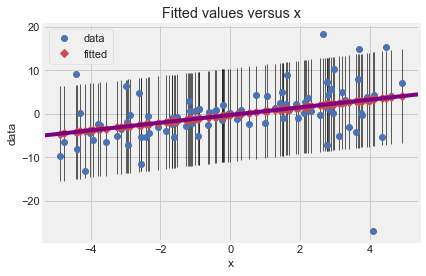

In [13]:
figure = smg.regressionplots.plot_fit(regression, 1)
line = smg.regressionplots.abline_plot(model_results=regression, ax=figure.axes[0])

In [14]:
bad_indices = test[test['bonf(p)'] < 0.05].index.values
bad_indices

array([3])

In [15]:
df_outliers = df.loc[bad_indices]
df_outliers

,x,y
3,4.082078,-27.008035


In [16]:
x_outliers = df_outliers.x.values
y_outliers = df_outliers['y'].values

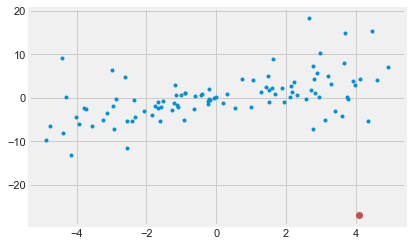

In [18]:
plt.plot(df.x,df.y,'.')
plt.plot(x_outliers, y_outliers,'ro')